In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\vahid\Desktop\QSS_analytics\DATA\USA_Housing.csv")
df = data.copy()

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.columns = [col.lower().replace(" ","_").replace(".","") for col in df.columns]

In [5]:
df.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

In [6]:
df.head()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.drop("address", axis=1, inplace=True)

In [8]:
df.head()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


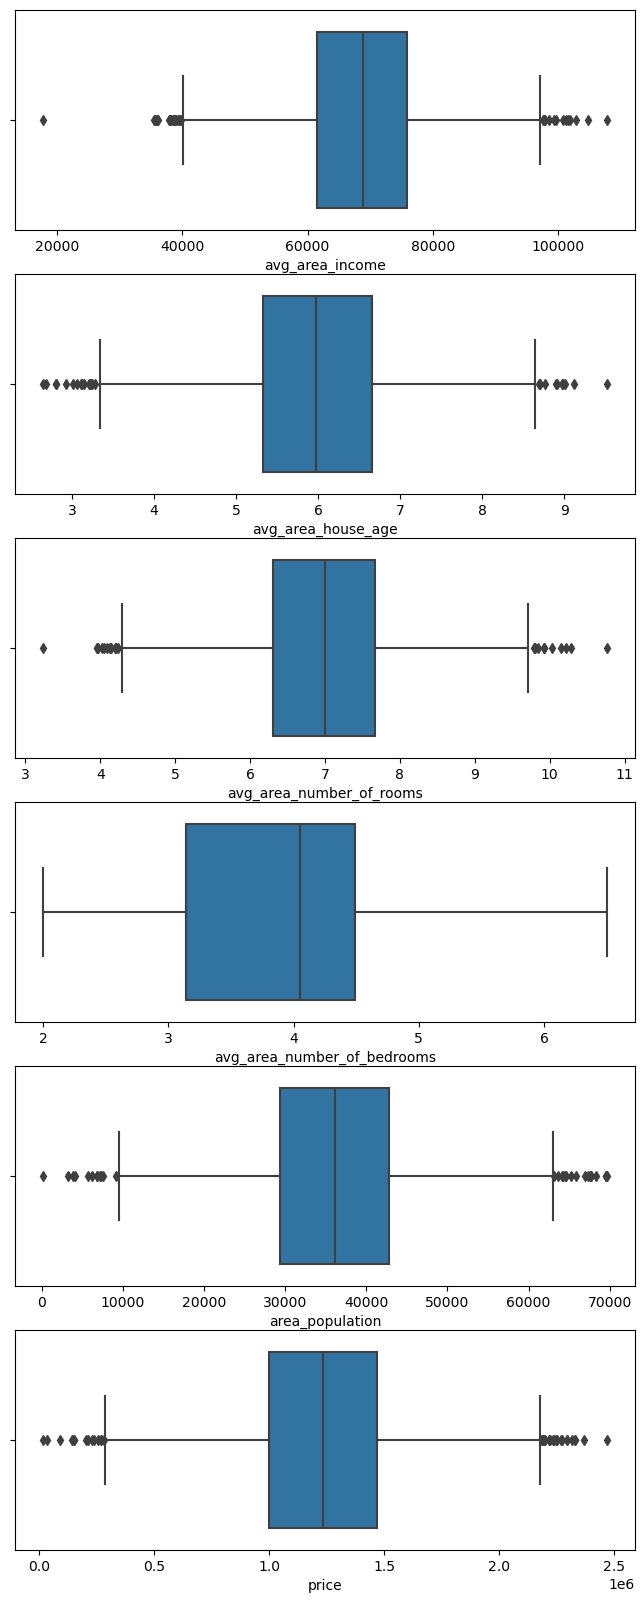

In [9]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(8,20))
for i in range(len(df.columns)):
    sns.boxplot(ax=axes[i],x=df.columns[i],data=df)
    

In [10]:
X = df.drop('price',axis=1)
Y = df['price']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.917997170683442

In [11]:
k = model.coef_
b = model.intercept_
print(f"k = {k}, b = {b}")

k = [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01], b = -2635072.900932409


In [12]:
k

array([2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
       1.52703134e+01])

In [13]:
from sklearn.datasets import fetch_openml
house = fetch_openml(name='house_prices', as_frame=True)

C:\Users\vahid\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
house  # DICTIONARY
house.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
X = house.data
X.shape

(1460, 80)

In [16]:
y = house.target
y.shape

(1460,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,136,20,RL,80.0,10400,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,5,2008,WD,Normal
1452,1453,180,RM,35.0,3675,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2006,WD,Normal
762,763,60,FV,72.0,8640,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,Con,Normal
932,933,20,RL,84.0,11670,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,3,2007,WD,Normal
435,436,60,RL,43.0,10667,Pave,None,IR2,Lvl,AllPub,...,0,0,None,None,None,0,4,2009,ConLw,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,None,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,None,Reg,Lvl,AllPub,...,0,0,None,GdPrv,None,0,6,2007,WD,Normal


In [19]:
y_train

135     174000
1452    145000
762     215200
932     320000
435     212000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1022, dtype: int64

In [20]:
a=X.isnull().sum()
a.shape[0]
a[5]

C:\Users\vahid\AppData\Local\Temp\ipykernel_3292\2774249504.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a[5]


0

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
col = ['Alley','PoolQC','MiscFeature','Fence']
X.drop(columns=col,index=1,inplace=True)

C:\Users\vahid\AppData\Local\Temp\ipykernel_3292\1043233026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=col,index=1,inplace=True)


In [23]:
from sklearn.preprocessing import OrdinalEncoder # categoric -> numeric
from sklearn.impute import SimpleImputer         # Null deyerleri doldurma
from sklearn.linear_model import LinearRegression

In [24]:
# Pandas ile object type olanlari secme
categoric = X_train.select_dtypes(include=['object']).columns
numeric = X_train.select_dtypes(include=['int64','float64']).columns

In [25]:
categoric

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
numeric

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [27]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
numeric_imputer = SimpleImputer(strategy='median')
categoric_imputer = SimpleImputer(strategy='most_frequent')

In [28]:
X_train[numeric] = numeric_imputer.fit_transform(X_train[numeric])

In [29]:
X_test[numeric] =  numeric_imputer.transform(X_test[numeric])

In [30]:
X_train[categoric] = categoric_imputer.fit_transform(X_train[categoric])
X_test[categoric] = categoric_imputer.transform(X_test[categoric])

In [43]:
X_train[categoric] = encoder.fit_transform(X_train[categoric])
X_test[categoric] = encoder.transform(X_test[categoric])

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.score(X_test,y_test) 

0.8479799650139715

In [35]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,136.0,20.0,3.0,80.0,10400.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,2.0,4.0,0.0,5.0,2008.0,8.0,4.0
1452,1453.0,180.0,4.0,35.0,3675.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,5.0,2006.0,8.0,4.0
762,763.0,60.0,1.0,72.0,8640.0,1.0,2.0,3.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,6.0,2010.0,2.0,4.0
932,933.0,20.0,3.0,84.0,11670.0,1.0,2.0,0.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,3.0,2007.0,8.0,4.0
435,436.0,60.0,3.0,43.0,10667.0,1.0,2.0,1.0,3.0,0.0,...,0.0,0.0,3.0,4.0,4.0,0.0,4.0,2009.0,5.0,4.0


In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [41]:
X_test
#Y_pred = model.predict(X)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Alley
- Fence
- MiscFeature
- PoolQC


In [42]:
MAE = mean_absolute_error(y_test,Y_pred)

NameError: name 'Y_pred' is not defined